In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

from IPython.display import Image
import pydotplus
import seaborn as sns
import pydot
import os

In [1]:
counties = ["cochise", "coconino", "gila", "graham", "maricopa", "mohave", "pima", "navajo", "santa_cruz", "yavapai", "yuma"]
counties

['cochise',
 'coconino',
 'gila',
 'graham',
 'maricopa',
 'mohave',
 'pima',
 'navajo',
 'santa_cruz',
 'yavapai',
 'yuma']

In [8]:
for county in counties:
    data = pd.read_csv("C:/Users/Mason/Documents/Capstone-Fall-2021-main/final_data/"+ county + ".csv")
    hmi = data.iloc[:, 1]
    data.iloc[:, 1] = pd.cut(data.iloc[:, 1],bins =[0, 199999, 400000], labels = ['0','1'])
    hmi = data.iloc[:, 1]

hmi

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
Name: yuma hmi, dtype: category
Categories (2, object): ['0' < '1']

In [23]:
    X = data.drop(data.columns[1], axis=1)
    y = hmi
    X

,date,total arrests,crime rate,population estimates,poverty percentage,state tax
0,2000,7376,3806.9,160675,21.0,19930000
1,2001,7218,3421.6,163167,21.0,22894000
2,2002,8051,3510.8,166071,19.0,22894000
3,2003,9184,3685.9,169297,17.0,25229000
4,2004,9341,3786.9,174000,18.0,19641000
5,2005,9618,3684.2,180194,19.0,28442000
6,2006,9418,3636.4,185267,19.0,44981000
7,2007,9267,3537.8,189181,17.8,37148000
8,2008,7395,3031.4,193299,22.0,36303000
9,2009,6821,3223.8,196972,19.2,35696000


In [1]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict((X_test))
    r2 = metrics.r2_score(y_test, y_pred)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    r2

NameError: name 'train_test_split' is not defined

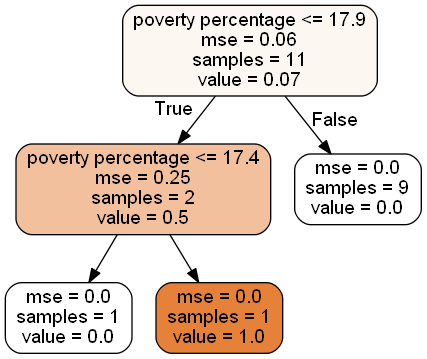

In [51]:
    export_graphviz(model.estimators_[1], out_file='tree.dot',feature_names= X_train.columns, rounded = True, proportion= False, precision=2, filled=True)
    graph = pydotplus.graph_from_dot_file("tree.dot")
    Image(graph.create_png())